# Heart Disease Prediction Model using Machine Learning.

In this Project, we are going to build a machine learning model which can predict that a person has heart disease or not based on the information provided.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading dataset.
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Brief Information about Data.

Chest Pain Type :
1. **TA (typical angina)** : Typical (classic) angina chest pain consists of (1) Substernal chest pain or discomfort that is (2) Provoked by exertion or emotional stress and (3) relieved by rest or nitroglycerine (or both).
2. **ATA (atypical angina)** : Atypical (probable) angina chest pain applies when 2 out of 3 criteria of classic angina are present.
3. **NAP (non-anginal pain)** : Not related to heart problems.
4. **ASY (asymptomatic)** : Heart problem without any symptoms.

Resting BP : 
1. Less than **90/60 mmHg** is consideres as **Low**.
2. Less than **120/80 mmHg** is considered as **Normal**.
3. In the range of **120-129 (top) and less than 80 (bottom)** is considered as **Prehypertension**.
4. In the range of **130-139 (top) and 80-89 (bottom)** is considered as **Hypertension Stage-1**.
5. Greater than **140/90 mmHg** is considered as **Hypertension Stage-2**.


Cholesterol :
1. Less than **200mg/dl** is considered as **Normal**.
2. In the range of **200 - 239mg/dl** is considered as **Borderline high**.
3. Greater than **240mg/dl** is considered as **High**.

Fasting BS :
1. Fasting BS > 120mg/dl ------> 1.
2. Fasting BS <= 120mg/dl -----> 0.

Resting ECG :
1. **Normal**.
2. **ST (st-t wave abnormality)** : Refer to changes in the ST segment on an ECG, which can indicate problems with the heart's electrical activity. 
3. **LVH (probable or definite left ventricular hypertrophy)** : A condition where the wall of the heart's left ventricle (the main pumping chamber) becomes thicker than normal. 

Exercise angina : 
1. Refers to chest pain or discomfort that occurs or worsens during physical activity or exertion, often indicating reduced blood flow to the heart muscle. 


Heart Disease :
1. heart disease -> 1
2. normal -> 0

ST slope :
1. up
2. flat
3. down

In [5]:
df.shape

(918, 12)

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [11]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [12]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [13]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

# E.D.A. (Exploratory Data Analysis)

Numerical Features:
1. Age,
2. Resting BP,
3. Cholesterol,
4. Max heart rate,
5. Oldpeak

Categorical Features:
1. Sex,
2. ChestPaintype,
3. FastingBS,
4. RestingECG,	
5. ExerciseAngina,	
6. ST_Slope,
7. HeartDisease (Label).


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution

<Axes: xlabel='Age', ylabel='Count'>

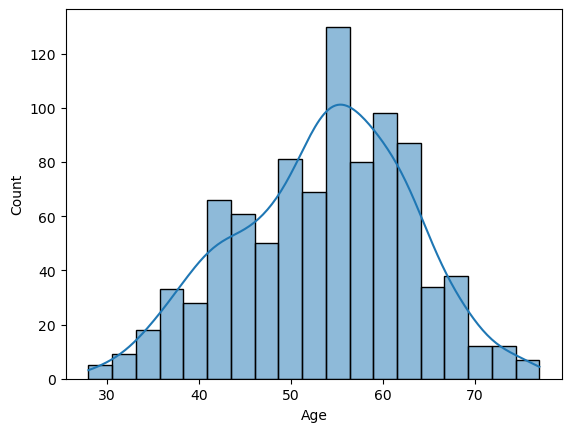

In [15]:
sns.histplot(df['Age'],kde=True)

Age looks normally distributed with a mean of 55 approx.

<Axes: xlabel='Age'>

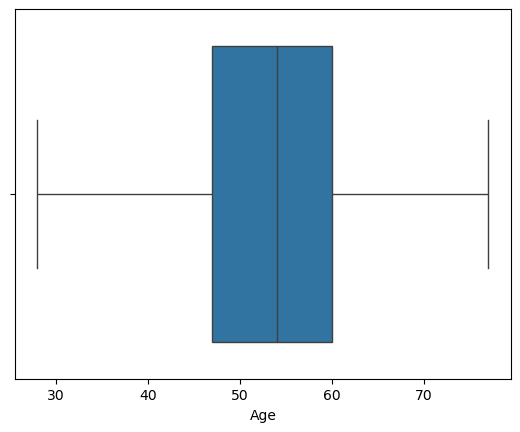

In [16]:
sns.boxplot(x=df['Age'])

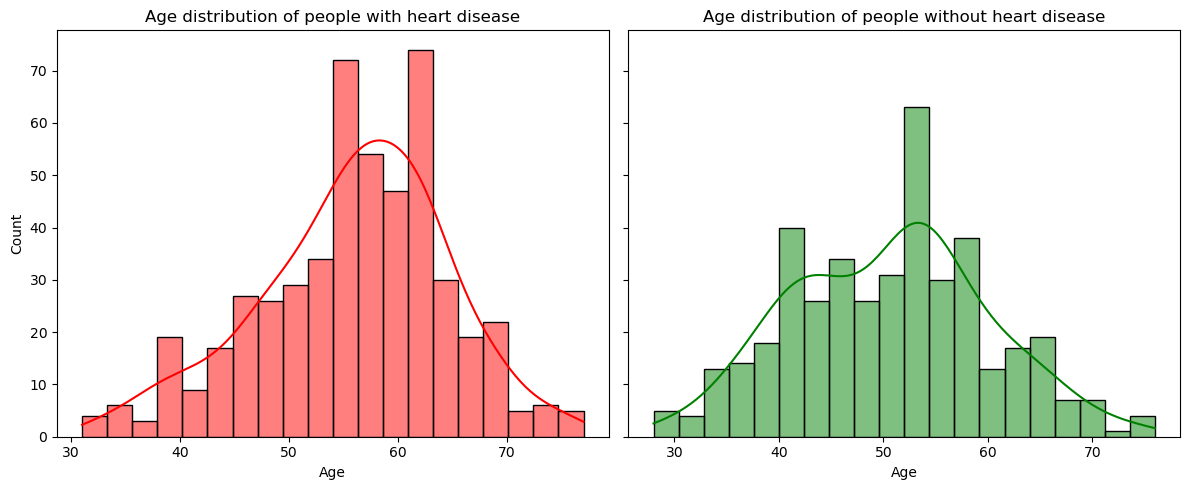

In [17]:
fig,axes = plt.subplots(1,2,figsize=(12,5),sharey=True)

sns.histplot(data=df[df['HeartDisease']==1],x='Age',kde=True,color='r',ax=axes[0],bins=20)
axes[0].set_title('Age distribution of people with heart disease')

sns.histplot(data=df[df['HeartDisease']==0],x='Age',kde=True,color='g',ax=axes[1],bins=20)
axes[1].set_title('Age distribution of people without heart disease')

plt.tight_layout()
plt.show()

# Cholesterol distribution

<Axes: xlabel='Cholesterol', ylabel='Count'>

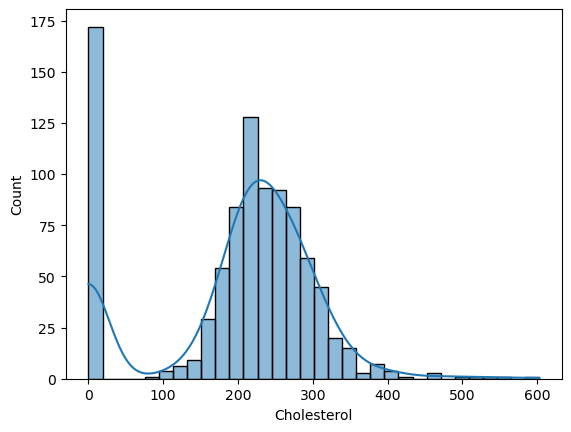

In [18]:
sns.histplot(df['Cholesterol'],kde=True)

There are total 172 values where the cholesterol is 0 which are **Invalid**.

In [19]:
df[df['Cholesterol'] == 0].groupby('Cholesterol').count().reset_index()

,Cholesterol,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,172,172,172,172,172,172,172,172,172,172,172


In [20]:
# df['Cholesterol'] = df['Cholesterol'].replace(0,np.nan)
# df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].median())
# sns.histplot(df['Cholesterol'],kde=True)

In [21]:
# sns.histplot(df[df['HeartDisease']==1]['Cholesterol'],kde=True)

In [22]:
# sns.histplot(df[df['HeartDisease']==0]['Cholesterol'],kde=True)

# Regression model : Zero Cholesterol

Making a Regression model which will predict the cholesterol of a person based on their **Age, Sex, RestingBP** and **MaxHR**.

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
new_df = df[['Age','Sex','RestingBP','MaxHR','Cholesterol']]
new_df['Sex'].replace(['M','F'],[0,1],inplace=True)
new_df

,Age,Sex,RestingBP,MaxHR,Cholesterol
0,40,0,140,172,289
1,49,1,160,156,180
2,37,0,130,98,283
3,48,1,138,108,214
4,54,0,150,122,195
...,...,...,...,...,...
913,45,0,110,132,264
914,68,0,144,141,193
915,57,0,130,115,131
916,57,1,130,174,236


In [26]:
# splitting data in x and y.
x = new_df[['Age','Sex','RestingBP','MaxHR']]
y = new_df['Cholesterol']

In [27]:
# fitting model.
model.fit(x,y)

LinearRegression()

In [28]:
df_missing_chol = df[df['Cholesterol'] == 0]
df_missing_chol = df_missing_chol[['Age','Sex','RestingBP','MaxHR']]
df_missing_chol['Sex'].replace(['M','F'],[0,1],inplace=True)
df_missing_chol

,Age,Sex,RestingBP,MaxHR
293,65,0,115,93
294,32,0,95,127
295,61,0,105,110
296,50,0,145,139
297,57,0,110,131
...,...,...,...,...
514,43,0,122,120
515,63,0,130,160
518,48,0,102,110
535,56,0,130,122


In [29]:
# model prediction.
predicted_chol = model.predict(df_missing_chol)

In [30]:
# filling 0 cholesterol entries with values predicted by regression model.
df.loc[df['Cholesterol'] == 0,'Cholesterol'] = predicted_chol

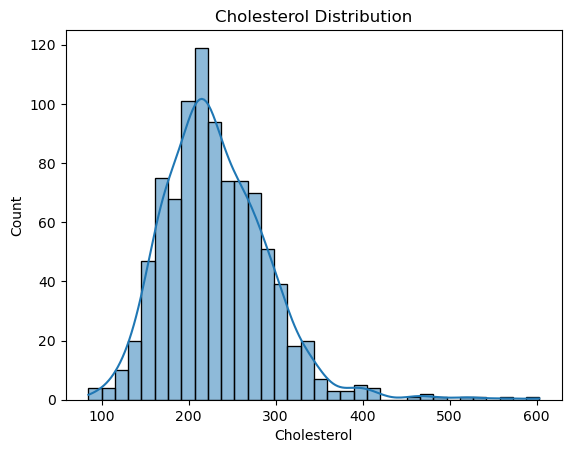

In [31]:
sns.histplot(df['Cholesterol'],kde=True)
plt.title('Cholesterol Distribution')
plt.show()

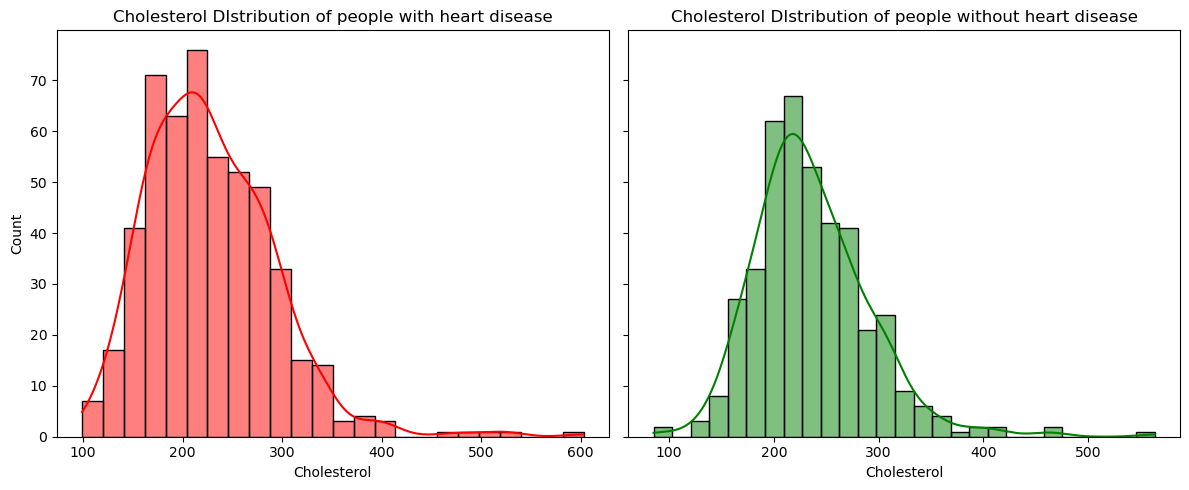

In [32]:
fig ,axes = plt.subplots(1,2,figsize=(12,5),sharey=True)

sns.histplot(data=df[df['HeartDisease']==1],x='Cholesterol',kde=True,color='r',ax=axes[0])
axes[0].set_title('Cholesterol DIstribution of people with heart disease')

sns.histplot(data=df[df['HeartDisease']==0],x='Cholesterol',kde=True,color='g',ax=axes[1])
axes[1].set_title('Cholesterol DIstribution of people without heart disease')

plt.tight_layout()
plt.show()

# Resting BP

<Axes: xlabel='RestingBP', ylabel='Count'>

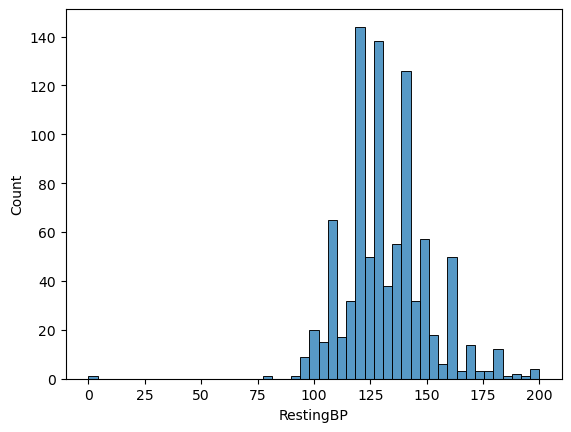

In [33]:
sns.histplot(data = df['RestingBP'])

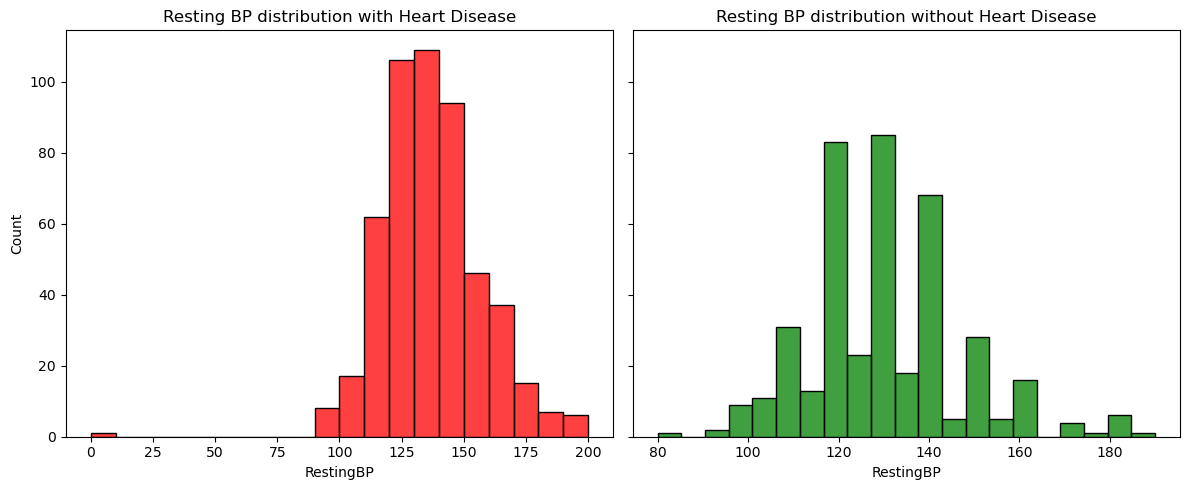

In [34]:
fig,axes = plt.subplots(1,2,figsize=(12,5),sharey=True)

sns.histplot(data = df[df['HeartDisease'] == 1],x='RestingBP',color='r',ax=axes[0],bins=20)
axes[0].set_title('Resting BP distribution with Heart Disease')

sns.histplot(data = df[df['HeartDisease'] == 0],x='RestingBP',color='g',ax=axes[1])
axes[1].set_title('Resting BP distribution without Heart Disease')

plt.tight_layout()
plt.show()

<Axes: ylabel='RestingBP'>

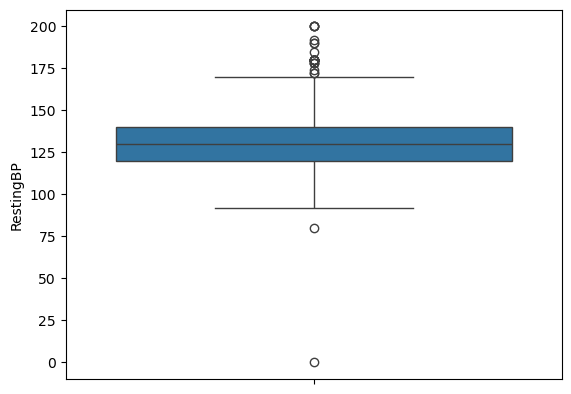

In [35]:
sns.boxplot(data = df['RestingBP'])

In [36]:
df[df['RestingBP']>175]['HeartDisease'].value_counts()

HeartDisease
1    15
0     8
Name: count, dtype: int64

# Max Heart Rate 

<Axes: xlabel='MaxHR', ylabel='Count'>

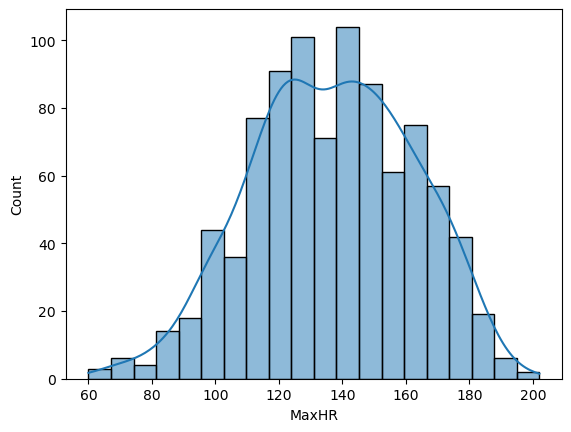

In [37]:
sns.histplot(data=df,x='MaxHR',kde=True)

<Axes: xlabel='MaxHR'>

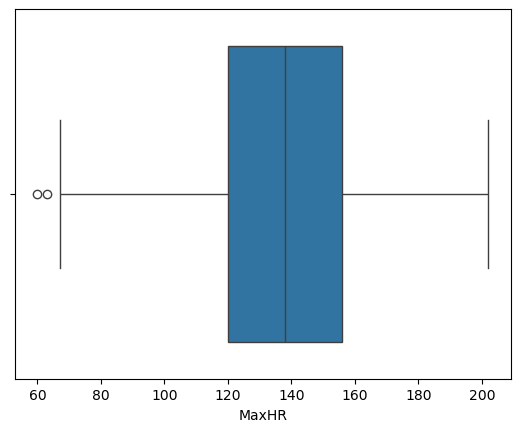

In [38]:
sns.boxplot(data=df,x='MaxHR')

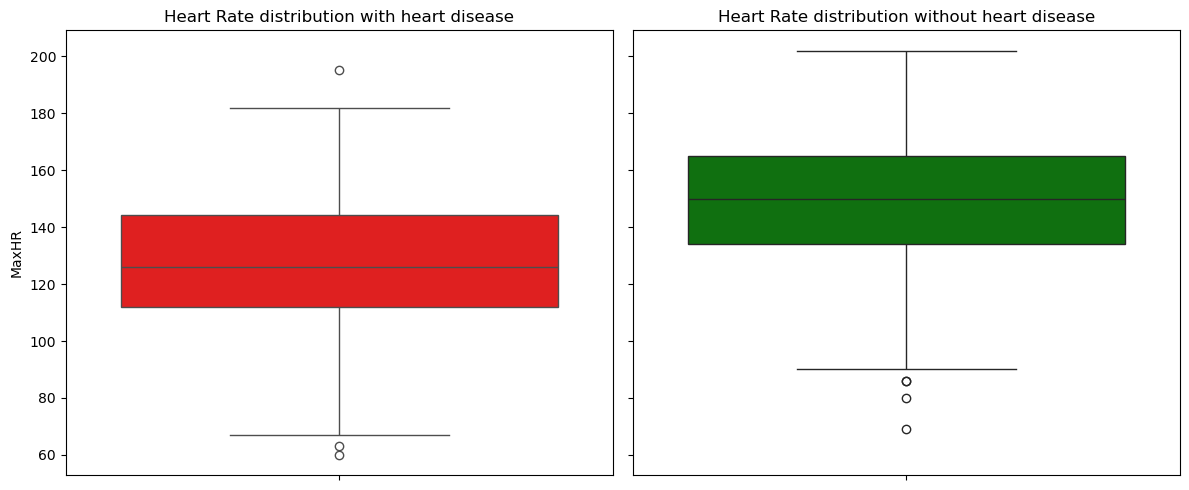

In [39]:
fig,axes = plt.subplots(1,2,figsize=(12,5),sharey=True)

sns.boxplot(data=df[df['HeartDisease'] == 1],y='MaxHR',color='r',ax= axes[0])
axes[0].set_title('Heart Rate distribution with heart disease')

sns.boxplot(data=df[df['HeartDisease'] == 0],y='MaxHR',color='g',ax= axes[1])
axes[1].set_title('Heart Rate distribution without heart disease')

plt.tight_layout()
plt.show()

# Oldpeak

<Axes: xlabel='Oldpeak', ylabel='Count'>

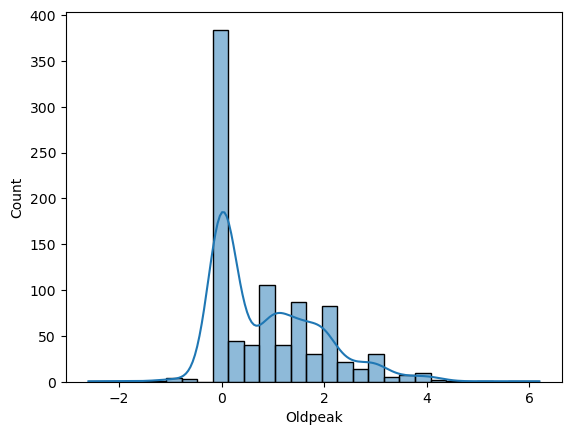

In [40]:
sns.histplot(data =df, x ='Oldpeak',kde=True)

<Axes: xlabel='Oldpeak'>

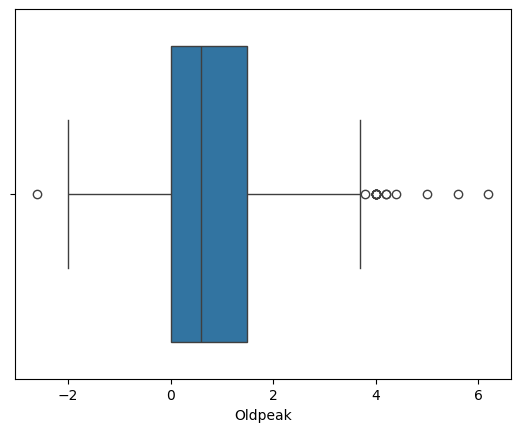

In [41]:
sns.boxplot(data =df, x ='Oldpeak')

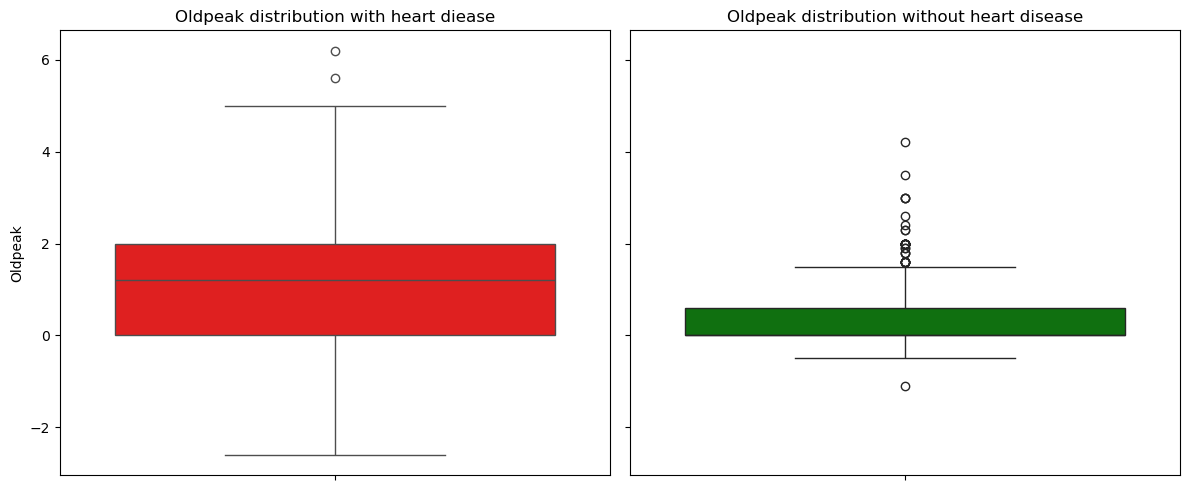

In [42]:
fig,axes = plt.subplots(1,2,figsize=(12,5),sharey =True)

sns.boxplot(data=df[df['HeartDisease'] == 1],y='Oldpeak',color='r',ax =axes[0])
axes[0].set_title('Oldpeak distribution with heart diease')

sns.boxplot(data=df[df['HeartDisease'] == 0],y='Oldpeak',color='g',ax =axes[1])
axes[1].set_title('Oldpeak distribution without heart disease')

plt.tight_layout()
plt.show()

In [43]:
df[df['Oldpeak'] >2]['HeartDisease'].value_counts()

HeartDisease
1    91
0     9
Name: count, dtype: int64

# ChestPainType

<Axes: xlabel='ChestPainType', ylabel='count'>

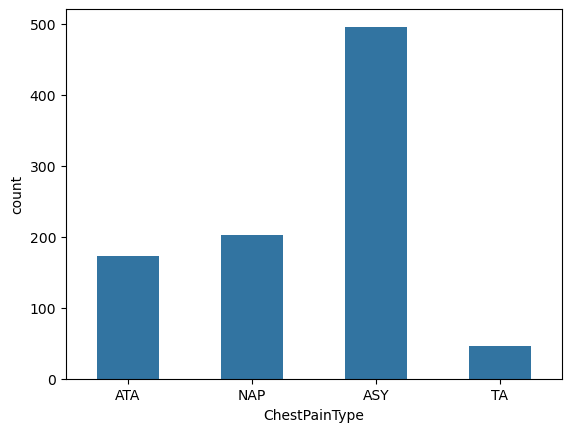

In [44]:
sns.countplot(data=df,x='ChestPainType',width=0.5)

<Axes: xlabel='ChestPainType', ylabel='count'>

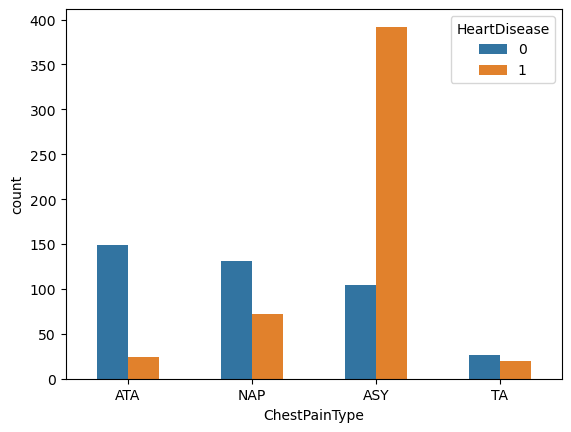

In [45]:
sns.countplot(data=df,x='ChestPainType',hue='HeartDisease',width=0.5)

Above Plots shows that people with heart disease are more likely to have **Asymptomatic chest pain**.

# Gender

<Axes: xlabel='Sex', ylabel='count'>

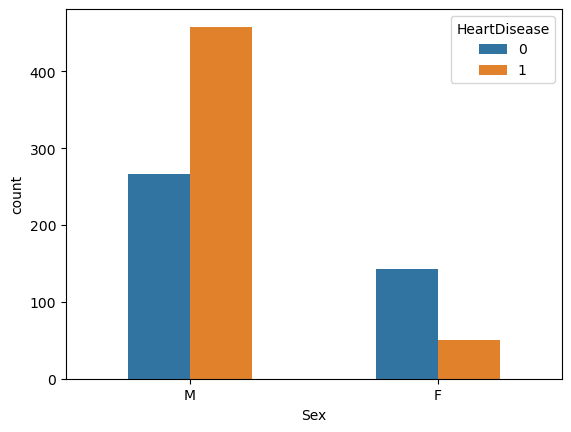

In [46]:
sns.countplot(data=df,x='Sex',hue='HeartDisease',width=0.5)

As above plot shows, Males have more chances of heart disease at compared to females.

# Fasting BS

<Axes: xlabel='HeartDisease', ylabel='count'>

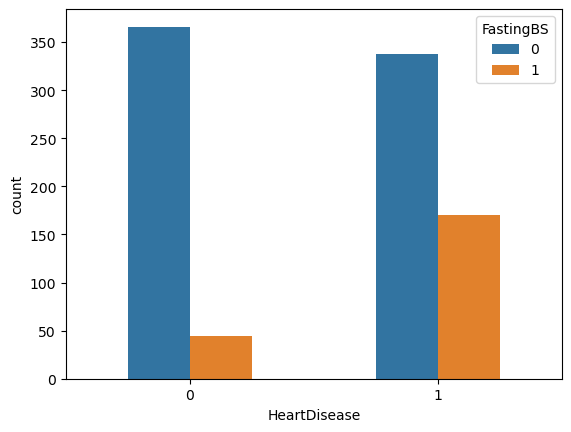

In [47]:
sns.countplot(data=df,x='HeartDisease',hue='FastingBS',width=0.5)

# Resting ECG

<Axes: xlabel='RestingECG', ylabel='count'>

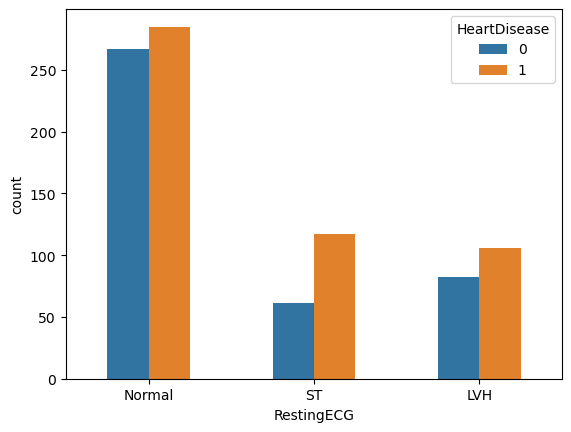

In [48]:
sns.countplot(data=df,x='RestingECG',hue='HeartDisease',width=0.5)

# Overall Correlation

<Axes: >

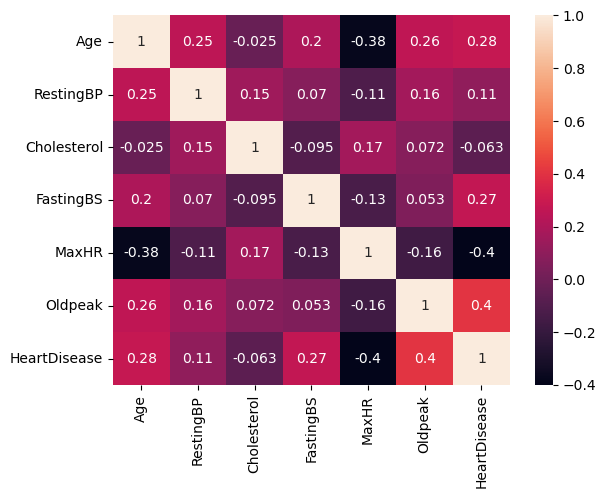

In [49]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [50]:
correlation = df.corr(numeric_only=True)['HeartDisease'].drop('HeartDisease')

<Axes: >

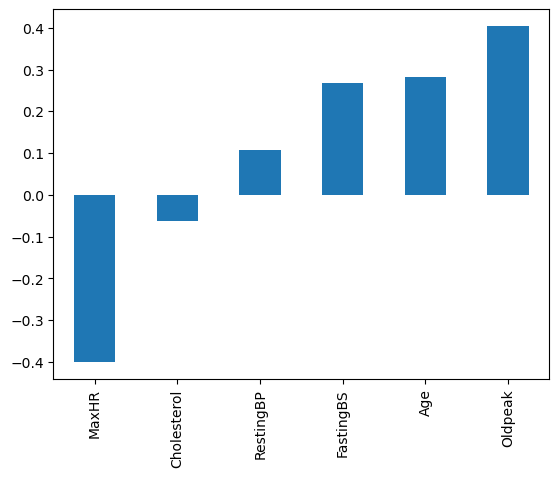

In [51]:
correlation.sort_values().plot(kind='bar')

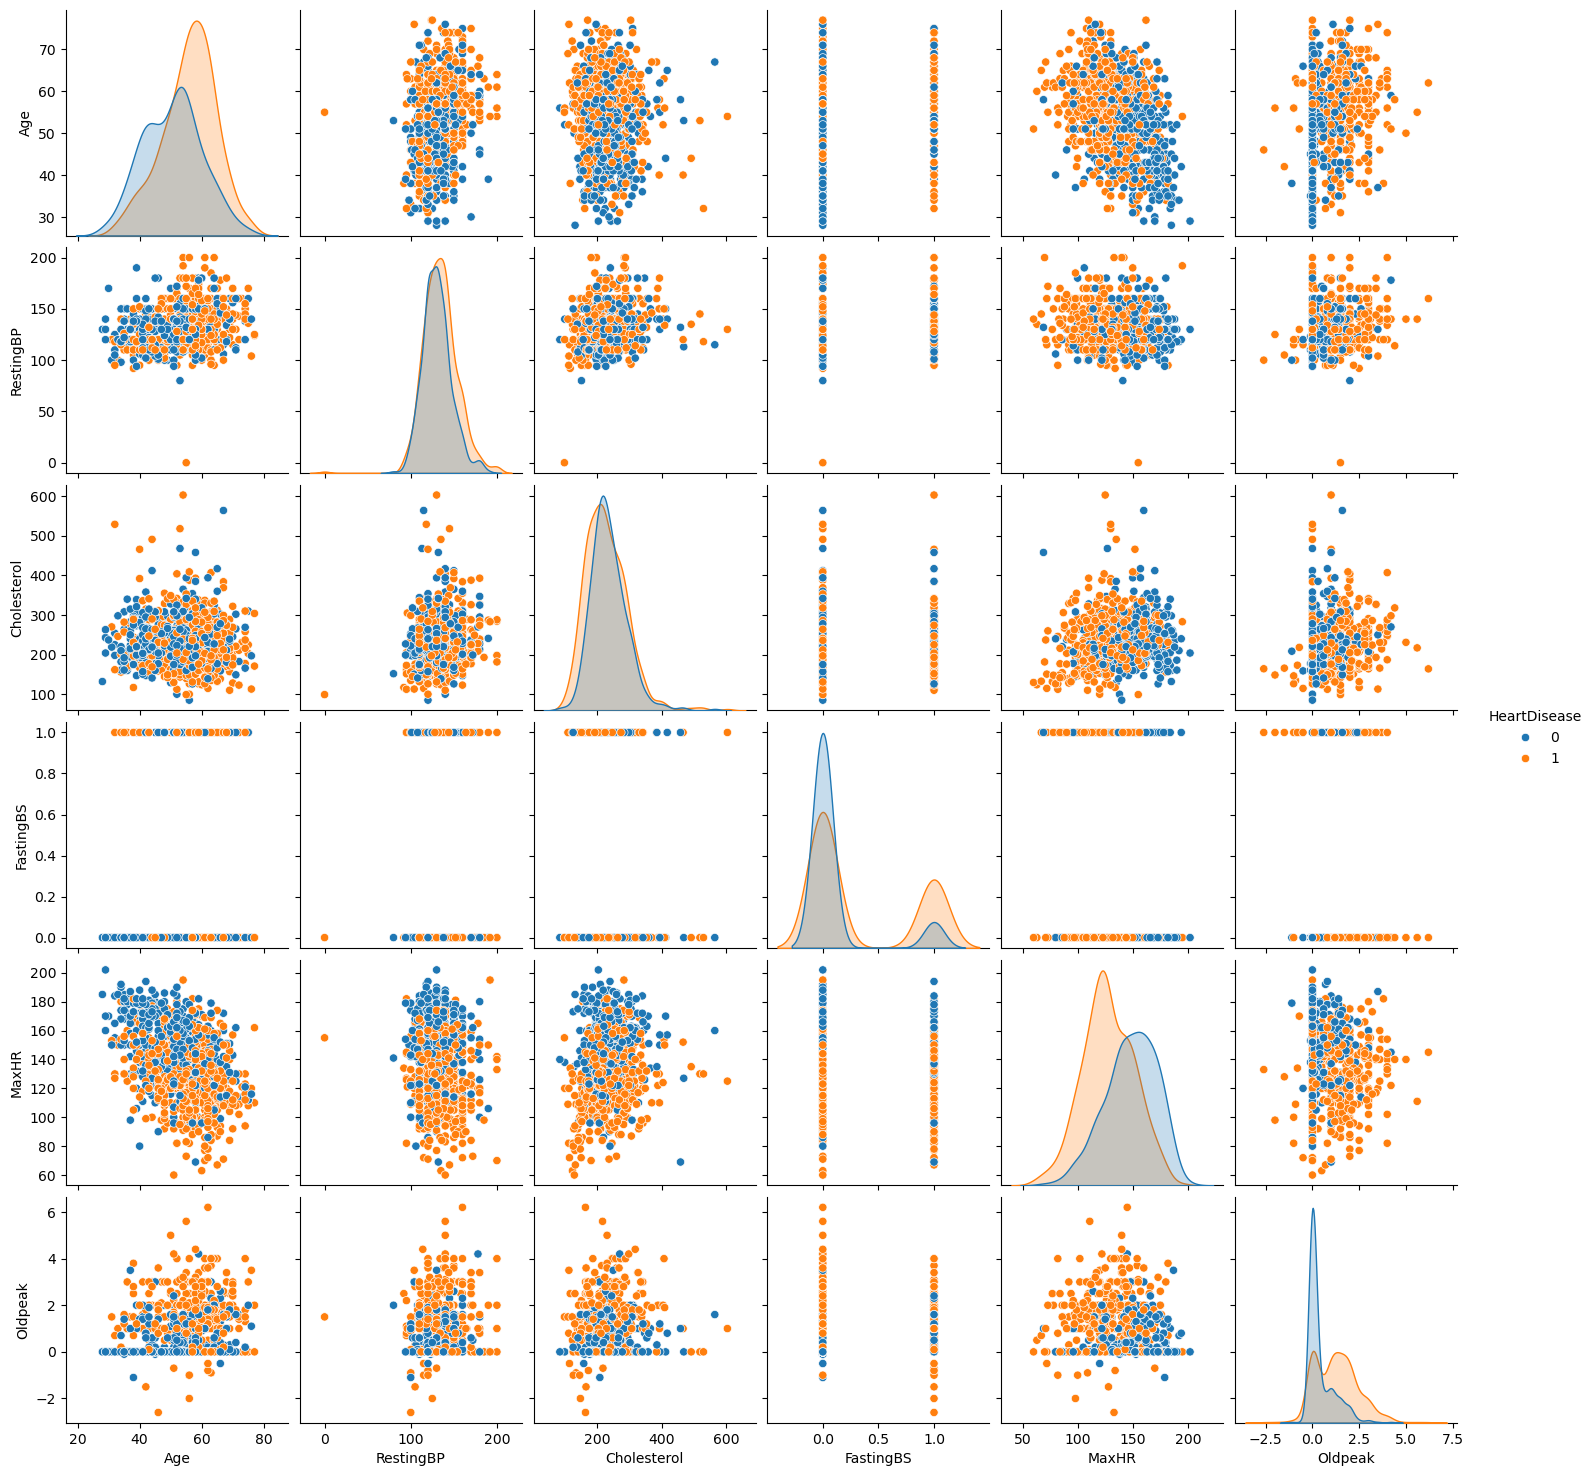

In [52]:
sns.pairplot(data=df,hue='HeartDisease')

From the Pairplot it is clearly shown that **MaxHR** and **Oldpeak** can be out key attributes when predicting heart disease.

 # Data Preprocessing

In this step we convert our raw data into a numercal so we can use it to train models.
This includes **Label Encoding** and **One-Hot Encoding**.

In [53]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


Encoding **SEX** and **ExerciseAngina** attributes.

In [54]:
df['Sex'].replace(['M','F'],[1,0],inplace=True)
df['ExerciseAngina'].replace(['Y','N'],[1,0],inplace=True)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289.0,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180.0,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283.0,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214.0,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195.0,0,Normal,122,0,0.0,Up,0


In [55]:
pd.get_dummies(df['ChestPainType'],dtype='int')

,ASY,ATA,NAP,TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
913,0,0,0,1
914,1,0,0,0
915,1,0,0,0
916,0,1,0,0


One Hot Encoding on **ChestPainType**, **RestingBP** and **ST_Slope**.

In [56]:
new_df = pd.concat([df,pd.get_dummies(df['ChestPainType'],dtype='int')],axis=1)
new_df = pd.concat([new_df,pd.get_dummies(df['RestingECG'],dtype='int')],axis=1)
new_df = pd.concat([new_df,pd.get_dummies(df['ST_Slope'],dtype='int')],axis=1)

In [57]:
new_df.drop(['ChestPainType','RestingECG','ST_Slope'],axis=1,inplace=True)
new_df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,1,140,289.0,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180.0,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283.0,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214.0,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195.0,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264.0,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0
914,68,1,144,193.0,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0
915,57,1,130,131.0,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0
916,57,0,130,236.0,0,174,0,0.0,1,0,1,0,0,1,0,0,0,1,0


# Model Building

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.metrics import classification_report,precision_score,recall_score
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,cross_validate
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [60]:
X = new_df.drop(['HeartDisease'],axis=1)
X.head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,1,140,289.0,0,172,0,0.0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180.0,0,156,0,1.0,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283.0,0,98,0,0.0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214.0,0,108,1,1.5,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195.0,0,122,0,0.0,0,0,1,0,0,1,0,0,0,1
5,39,1,120,339.0,0,170,0,0.0,0,0,1,0,0,1,0,0,0,1
6,45,0,130,237.0,0,170,0,0.0,0,1,0,0,0,1,0,0,0,1
7,54,1,110,208.0,0,142,0,0.0,0,1,0,0,0,1,0,0,0,1
8,37,1,140,207.0,0,130,1,1.5,1,0,0,0,0,1,0,0,1,0
9,48,0,120,284.0,0,120,0,0.0,0,1,0,0,0,1,0,0,0,1


In [61]:
y = new_df['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# 1. Logistic Regression

In [63]:
# regression model.
reg_model = LogisticRegression(solver='liblinear')

In [64]:
# scaling features.
scaler1 = StandardScaler()
x_scaled = scaler1.fit_transform(X_train)

In [65]:
x_scaled

array([[-1.24506731,  0.54060477, -0.70898547, ...,  3.78043207,
        -1.03325003, -0.84792072],
       [-1.8862362 ,  0.54060477, -0.16628515, ..., -0.26452003,
        -1.03325003,  1.17935554],
       [ 0.25099346,  0.54060477,  0.91911549, ..., -0.26452003,
         0.96781995, -0.84792072],
       ...,
       [ 0.67843939,  0.54060477, -0.16628515, ..., -0.26452003,
        -1.03325003,  1.17935554],
       [ 0.67843939,  0.54060477,  1.02765555, ..., -0.26452003,
        -1.03325003,  1.17935554],
       [-1.45879027, -1.84978019,  0.91911549, ..., -0.26452003,
         0.96781995, -0.84792072]])

In [66]:
# fitting the model.
reg_model.fit(x_scaled,y_train)

LogisticRegression(solver='liblinear')

In [67]:
# prediction.
y_pred = reg_model.predict(x_scaled)

In [68]:
print('Accuracy :',accuracy_score(y_train,y_pred))
print('Precision :',precision_score(y_train,y_pred))
print('Recall :',recall_score(y_train,y_pred))

Accuracy : 0.8623978201634878
Precision : 0.8676470588235294
Recall : 0.8827930174563591


In [69]:
confusion_matrix(y_train,y_pred)

array([[279,  54],
       [ 47, 354]], dtype=int64)

In [70]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       333
           1       0.87      0.88      0.88       401

    accuracy                           0.86       734
   macro avg       0.86      0.86      0.86       734
weighted avg       0.86      0.86      0.86       734



# Cross-val Score : Logistic Regression

In [71]:
log_score = cross_val_score(reg_model,x_scaled,y_train,cv=5)

In [72]:
print('Accuracy :',log_score.mean())
print('Std. Dev.:',log_score.std())

Accuracy : 0.8514677103718199
Std. Dev.: 0.021494735769066024


# 2. Decision Tree

In [73]:
# decision tree model.
tree_model = DecisionTreeClassifier(max_depth=3,min_samples_split=10,random_state=42)

In [74]:
# fitting the model.
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=42)

In [75]:
# prediction.
tree_pred = tree_model.predict(X_train)

In [76]:
print('Accuracy :',accuracy_score(y_train,tree_pred))
print('Precision :',precision_score(y_train,tree_pred))
print('Recall :',recall_score(y_train,tree_pred))

Accuracy : 0.8651226158038147
Precision : 0.8431818181818181
Recall : 0.9251870324189526


In [77]:
confusion_matrix(y_train,tree_pred)

array([[264,  69],
       [ 30, 371]], dtype=int64)

In [78]:
print(classification_report(y_train,tree_pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       333
           1       0.84      0.93      0.88       401

    accuracy                           0.87       734
   macro avg       0.87      0.86      0.86       734
weighted avg       0.87      0.87      0.86       734



# Cross-val Score : Decision Tree

In [79]:
tree_score = cross_val_score(tree_model,X_train,y_train,cv=5)

In [80]:
print('Accuracy :',tree_score.mean())
print('Std. Dev.:',tree_score.std())

Accuracy : 0.8214984623986581
Std. Dev.: 0.021926277495229397


In [101]:
# compare_df = [[accuracy_score(y_train,y_pred),accuracy_score(y_train,tree_pred)],
#               [precision_score(y_train,y_pred),precision_score(y_train,tree_pred)],
#               [recall_score(y_train,y_pred),recall_score(y_train,tree_pred)]]

In [102]:
# compare_df = pd.DataFrame(compare_df)
# compare_df.rename(columns={0:'Logistic Regression',1:'Decision Tree'},inplace=True)
# compare_df.rename(index={0:'Accuracy',1:'Precision',2:'Recall'},inplace=True)
# compare_df.plot(kind='bar')

In [103]:
compare1_df = [[log_score.mean(),tree_score.mean()]]

<Axes: >

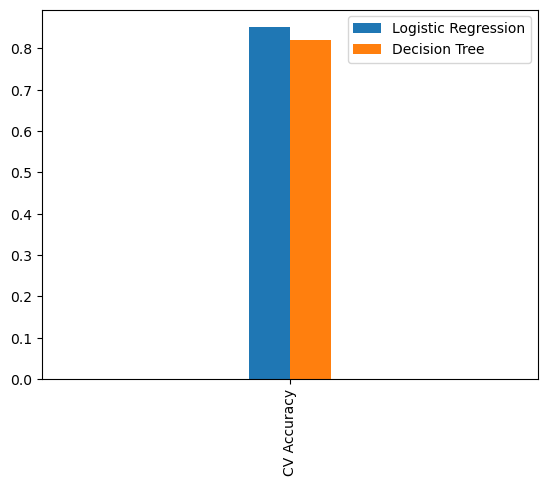

In [104]:
compare1_df = pd.DataFrame(compare1_df)
compare1_df.rename(columns={0:'Logistic Regression',1:'Decision Tree'},inplace=True)
compare1_df.rename(index={0:'CV Accuracy'},inplace=True)
compare1_df.plot(kind='bar',width=0.1)

# Fine-Tuning and Optimization.

In [105]:
# skf =StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [106]:
# log_reg_pipeline = Pipeline([
#     ('scalar',StandardScaler()),
#     ('clf',LogisticRegression(solver='liblinear'))
# ])
# log_scores = cross_val_score(log_reg_pipeline,X_train,y_train,cv=skf,scoring='accuracy')
# print(round(log_scores.mean(),2),'+/-',round(log_scores.std(),2))

In [107]:
# tree_pipeline = Pipeline([
#     ('clf',DecisionTreeClassifier(max_depth=3,min_samples_split=10,random_state=42))
# ])
# tree_scores = cross_val_score(tree_pipeline,X_train,y_train,cv=skf,scoring='accuracy')
# print(round(tree_scores.mean(),2),'+/-',round(tree_scores.std(),2))

Trying **Categorical** columns with **continuous** columns to see that it helps the model performance.

In [151]:
# converting age into categorical values and one hot encoding them.
cat_df = pd.get_dummies(pd.cut(X['Age'],bins=15,include_lowest=True),dtype='int')
new_X = pd.concat([X,cat_df],axis=1)
new_X.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ASY,ATA,...,"(44.333, 47.6]","(47.6, 50.867]","(50.867, 54.133]","(54.133, 57.4]","(57.4, 60.667]","(60.667, 63.933]","(63.933, 67.2]","(67.2, 70.467]","(70.467, 73.733]","(73.733, 77.0]"
0,40,1,140,289.0,0,172,0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,49,0,160,180.0,0,156,0,1.0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,37,1,130,283.0,0,98,0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,48,0,138,214.0,0,108,1,1.5,1,0,...,0,1,0,0,0,0,0,0,0,0
4,54,1,150,195.0,0,122,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [152]:
# converting Cholesterol into categorical values
new_X['n_Cholesterol'] = pd.cut(X['Cholesterol'],bins=[0,200,240,300,700],labels=False)

In [153]:
# converting Resting into categorical values
cat_bp = pd.get_dummies(pd.cut(X['RestingBP'],bins=[0,90,120,130,140,200],\
         labels=['low','normal','above normal','risk','high risk']),dtype='int')
new_X = pd.concat([new_X,cat_bp],axis=1)

In [154]:
# new_X['op*2'] = new_X['Oldpeak'] **2
# new_X['riskop'] = (new_X['Oldpeak'] > 2).astype('int')
# new_X['age_hr_ratio'] = new_X['Age']/new_X['MaxHR']
# new_X['age*hr'] = new_X['Age']*new_X['MaxHR']
# new_X['hr_age_diff'] = (new_X['MaxHR'] - new_X['Age'])
# # new_X['op_age_ratio'] = new_X['Oldpeak']/new_X['Age']
# # new_X['bp_hr_ratio'] = round(new_X['RestingBP']/new_X['MaxHR'],6)
# # new_X['op_hr_ratio'] = new_X['Oldpeak']/new_X['MaxHR']
# # new_X['invhr'] = (1/new_X['MaxHR'])

In [155]:
new_X.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ASY,ATA,...,"(63.933, 67.2]","(67.2, 70.467]","(70.467, 73.733]","(73.733, 77.0]",n_Cholesterol,low,normal,above normal,risk,high risk
0,40,1,140,289.0,0,172,0,0.0,0,1,...,0,0,0,0,2,0,0,0,1,0
1,49,0,160,180.0,0,156,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,37,1,130,283.0,0,98,0,0.0,0,1,...,0,0,0,0,2,0,0,1,0,0
3,48,0,138,214.0,0,108,1,1.5,1,0,...,0,0,0,0,1,0,0,0,1,0
4,54,1,150,195.0,0,122,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [156]:
new_X.columns = new_X.columns.astype(str)

In [157]:
# dropping continous columns.
new_X.drop(['RestingBP','Cholesterol'],axis=1,inplace=True)

In [158]:
# splittin into training and test data.
X_train,X_test,y_train,y_test = train_test_split(new_X,y,test_size=0.2,random_state=42)

In [159]:
print(X_train.shape)
print(X_test.shape)

(734, 37)
(184, 37)


In [160]:
# regression model.
reg_model = LogisticRegression(solver='liblinear',penalty='l1')

In [161]:
# scaling features.
scaler1 = StandardScaler()
x_scaled = scaler1.fit_transform(X_train)
x_scaled

array([[-1.24506731,  0.54060477,  1.84260945, ..., -0.53007293,
        -0.54901588, -0.57210629],
       [-1.8862362 ,  0.54060477, -0.5427086 , ...,  1.88653285,
        -0.54901588, -0.57210629],
       [ 0.25099346,  0.54060477,  1.84260945, ..., -0.53007293,
        -0.54901588,  1.74792695],
       ...,
       [ 0.67843939,  0.54060477, -0.5427086 , ...,  1.88653285,
        -0.54901588, -0.57210629],
       [ 0.67843939,  0.54060477, -0.5427086 , ..., -0.53007293,
        -0.54901588,  1.74792695],
       [-1.45879027, -1.84978019, -0.5427086 , ..., -0.53007293,
        -0.54901588,  1.74792695]])

In [162]:
# fitting the model with scaled data.
reg_model.fit(x_scaled,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [163]:
# prediction.
y_pred1 = reg_model.predict(x_scaled)

In [164]:
print('Accuracy :',accuracy_score(y_train,y_pred1)) # 8719
print('Precision :',precision_score(y_train,y_pred1)) # 8716
print('Recall :',recall_score(y_train,y_pred1)) # 8977

Accuracy : 0.8719346049046321
Precision : 0.8716707021791767
Recall : 0.8977556109725686


In [165]:
confusion_matrix(y_train,y_pred1)

array([[280,  53],
       [ 41, 360]], dtype=int64)

In [166]:
print(classification_report(y_train,y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       333
           1       0.87      0.90      0.88       401

    accuracy                           0.87       734
   macro avg       0.87      0.87      0.87       734
weighted avg       0.87      0.87      0.87       734



# FInal Prediction on Test Data

In [167]:
# scaling with different scaler.
scaler2 = StandardScaler()
x_scaled_test = scaler2.fit_transform(X_test)

In [168]:
# prediction on test data.
y_pred_test = reg_model.predict(x_scaled_test)

In [169]:
print('Accuracy :',accuracy_score(y_test,y_pred_test)) # 8695
print('Precision :',precision_score(y_test,y_pred_test)) # 9108
print('Recall :',recall_score(y_test,y_pred_test)) # 8598

Accuracy : 0.8695652173913043
Precision : 0.9108910891089109
Recall : 0.8598130841121495


In [170]:
confusion_matrix(y_test,y_pred_test)

array([[68,  9],
       [15, 92]], dtype=int64)

In [171]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        77
           1       0.91      0.86      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



# Comparision (Training VS Test Data)

In [172]:
dict1  = [{'Train': accuracy_score(y_train,y_pred1),
           'Test': accuracy_score(y_test,y_pred_test)},
          {'Train': precision_score(y_train,y_pred1),
           'Test': precision_score(y_test,y_pred_test)},
          {'Train': recall_score(y_train,y_pred1),
           'Test': recall_score(y_test,y_pred_test)}]

In [173]:
data = pd.DataFrame(dict1,index=['Accuracy','Precision','Recall'])
data

,Train,Test
Accuracy,0.871935,0.869565
Precision,0.871671,0.910891
Recall,0.897756,0.859813


<Axes: >

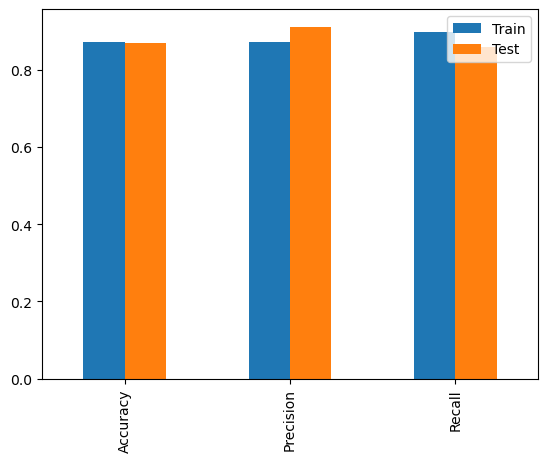

In [174]:
data.plot(kind='bar')

Now this model can perform well on training data as well as test data.

# Saving Model.

In [175]:
import pickle

In [176]:
pickle.dump(reg_model,open('model.pkl','wb'))
pickle.dump(scaler2,open('scaler.pkl','wb'))